# Workshop name

**Author:** Martin Beneš, Verena Lachner

<div style="text-align: center">
<img src="https://www.uibk.ac.at/media/filer_public/00/c3/00c369ba-9e7a-42a4-9f73-466c81dc951a/universitaet-innsbruck-logo-cmyk-farbe.jpg" style="height: 5em; display: inline; padding-right: 2em" />
<img src="https://www.uncoverproject.eu/wp-content/uploads/2021/05/UNCOVER-Logog-440x92.5-final-1.0.png" style="height: 4em; display: inline; padding-left: 2em" />
</div>

<div style="text-align: center">
<a href="https://www.github.com/uibk-uncover/mip-stego-demo">
github.com/uibk-uncover/mip-stego-demo
</a>
</div>

## Notebook setup

For this notebook, we will use a sample image `00001.tif` from ALASKA database. Run following code chunk to download it.

In [1]:
# download 00001.tif from ALASKA website
import requests
res = requests.get('http://alaska.utt.fr/DATASETS/ALASKA_v2_TIFF_512_COLOR/00001.tif', verify=False)
with open('00001.tif', 'wb') as f:
    f.write(res.content)

/opt/miniconda3/envs/dev/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'alaska.utt.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [5]:
import numpy as np
from PIL import Image
im = Image.open('00001.tif')  # load image
x = np.array(im.convert('L'))  # PIL to numpy

In [ ]:
import matplotlib.pyplot as plt

## LSBr leaves traces

LSBr leaves traces.

In [78]:
#
alpha = 1.
e = 2  # efficiency; because every other pixel is changed

In [79]:
#
payload = int(np.ceil(alpha * x.size))
probability = np.reshape([1/e]*payload + [0]*(x.size - payload), x.shape)
rng = np.random.default_rng(12345)
to_be_changed = rng.random(x.shape) < probability
print('Relative payload:', alpha)
print('Change rate:', np.mean(to_be_changed))

# modify
y = x.copy()
y[to_be_changed & (x % 2 == 0)] += 1
y[to_be_changed & (x % 2 != 0)] -= 1

Relative payload: 1.0
Change rate: 0.4995994567871094


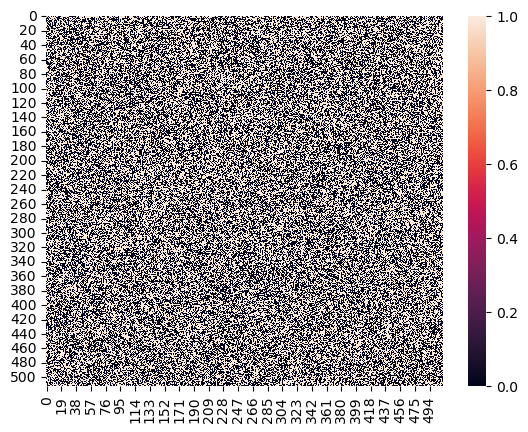

In [80]:
sns.heatmap(np.abs(y.astype('int') - x));

In [81]:
#
probability = np.ones(x.shape, dtype='float64') * alpha / e
rng = np.random.default_rng(12345)
to_be_changed = rng.random(x.shape) < probability
print('Relative payload:', alpha)
print('Change rate:', np.mean(to_be_changed))

# modify
y = x.copy()
y[to_be_changed & (x % 2 == 0)] += 1
y[to_be_changed & (x % 2 != 0)] -= 1

Relative payload: 1.0
Change rate: 0.4995994567871094


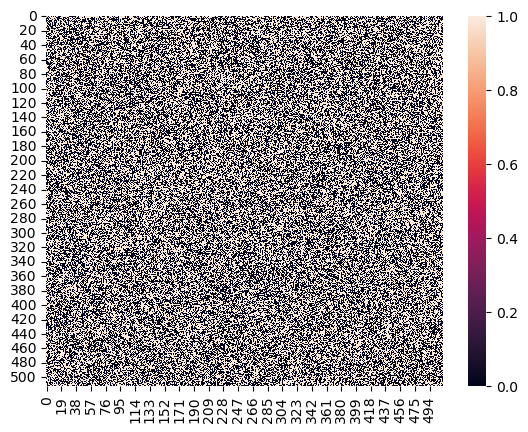

In [82]:
sns.heatmap(np.abs(y.astype('int') - x));

## We compare the histograms

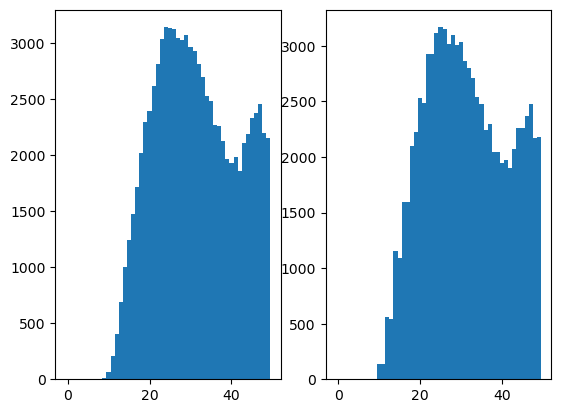

In [83]:
fig, ax = plt.subplots(1, 2)
start, end = 0, 50
ax[0].hist(x.flatten(), bins=end-start, range=(start-.5, end-.5));
ax[1].hist(y.flatten(), bins=end-start, range=(start-.5, end-.5));